<a href="https://colab.research.google.com/github/adalbertii/Modele-klasyfikacyjne/blob/main/cifar_10_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow


In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


10 klas:
samoloty,
samochody,
statki
ciężarówki,
koty,
ptaki,
jelenie,
konie,
psy
żaby.




Dane uczące to tablica składająca się z 50000 elementów. Każdy z nich zawiera trzy kanały (RBG) obrazka o rozdzielczości 32×32

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
il_zdjec = 16
zdjecia = np.zeros((il_zdjec,32,32,3), dtype=int)
opisy = np.zeros((il_zdjec,1), dtype=int)
for i in range(il_zdjec):
   indeks = np.random.randint(0, 50000)
   zdjecia[i] = x_train[indeks]
   opisy[i] = y_train[indeks]

zdjecia.shape

(16, 32, 32, 3)

In [9]:
opisy.shape

(16, 1)

In [10]:
slownik = {
   0: 'samolot',
   1: 'samochód',
   2: 'ptak',
   3: 'kot',
   4: 'jeleń',
   5: 'pies',
   6: 'żaba',
   7: 'koń',
   8: 'statek',
   9: 'ciężarówka',
}

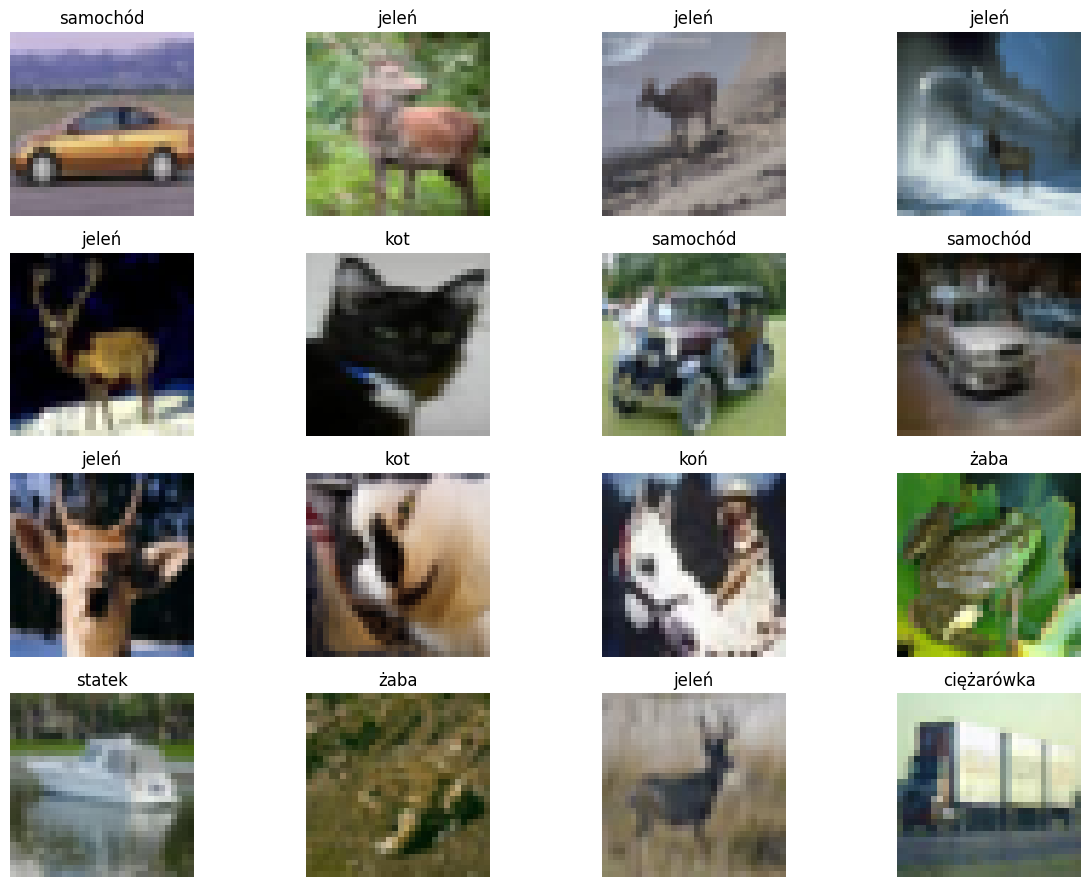

In [11]:
fig = plt.figure()
for n, (obrazek, label) in enumerate(zip(zdjecia, opisy)):
   a = fig.add_subplot(4, 4, n + 1)
   plt.imshow(obrazek)
   a.set_title(slownik[label[0]])
   a.axis('off')
fig.set_size_inches(fig.get_size_inches() * il_zdjec / 7)
plt.show()

**Klasyfikacja z wykorzystaniem klasycznej sieci neuronowej**

In [12]:
# 32 x 32 x 3 = 3072
x_train = x_train.reshape((-1, 3072))
x_test = x_test.reshape((-1, 3072))
x_train.shape

(50000, 3072)

In [13]:
#Ponieważ każdy piksel w każdym kanale określa intensywność składowej koloru dla piksela, to dane powinny być z przedziału od 0 do 255.
#Sprawdźmy to:
x_train.max()

255

In [14]:
x_train.min()

0

In [15]:
# znormalizujmy dane
x_train = (x_train / 255)- 0.5
x_test = (x_test / 255)- 0.5

In [17]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [18]:
#budowa modelu
model = Sequential([
   Dense(1024, activation='tanh', input_shape=(3072,)),
   Dense(512, activation='tanh'),
   Dense(256, activation='tanh'),
   Dense(128, activation='tanh'),
   Dense(64, activation='tanh'),
   Dense(10, activation='softmax')
])



In [19]:
#kompilacj modelu
model.compile(
   optimizer='RMSprop',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)



In [20]:
#proces uczenia
model.fit(
   x=x_train,
   y=to_categorical(y_train),
   epochs=15,
   shuffle=True
)

Epoch 1/15
1563/1563 [==============================] - 72s 45ms/step - loss: 1.8402 - accuracy: 0.3477
Epoch 2/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.6557 - accuracy: 0.4191
Epoch 3/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5684 - accuracy: 0.4495
Epoch 4/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5121 - accuracy: 0.4650
Epoch 5/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4675 - accuracy: 0.4835
Epoch 6/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4294 - accuracy: 0.4963
Epoch 7/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3984 - accuracy: 0.5073
Epoch 8/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3683 - accuracy: 0.5162
Epoch 9/15
1563/1563 [==============================] - 65s 42ms/step - loss: 1.3459 - accuracy: 0.5263
Epoch 10/15
1563/1563 [==============================] - 71s 45m

In [21]:
#ewaluacja modelu
eval = model.evaluate(
   x_test,
   to_categorical(y_test)
)

eval

313/313 [==============================] - 3s 9ms/step - loss: 1.4874 - accuracy: 0.4876


[1.4873735904693604, 0.4875999987125397]